<a href="https://colab.research.google.com/github/ragendhup/AutoMl/blob/main/AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tpot


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 736.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.4 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=6ac94149d6c70b691ea54f96a5e05e6fd4554df8c0aa5f9c849c326f9182b38e
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [2]:
pip install --upgrade scikit-learn

In [3]:
pip install tpot seaborn matplotlib

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.975

Generation 2 - Current best internal CV score: 0.975

Generation 3 - Current best internal CV score: 0.975

Generation 4 - Current best internal CV score: 0.975

Generation 5 - Current best internal CV score: 0.975

Best pipeline: MLPClassifier(input_matrix, alpha=0.0001, learning_rate_init=0.001)
Accuracy of the best model: 100.00%


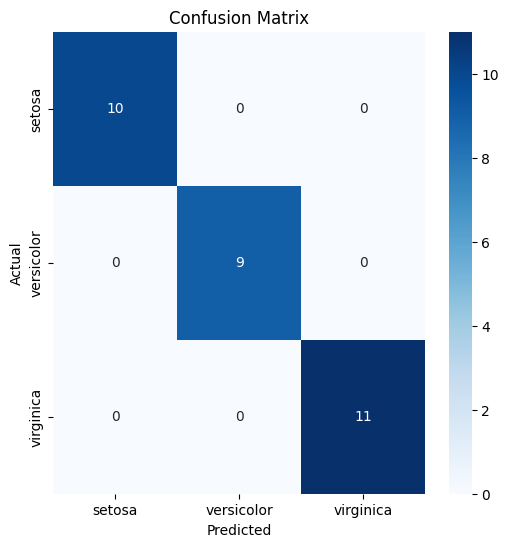

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [7]:

# Import necessary libraries
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Step 1: Load the Iris dataset
iris = load_iris()

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Step 3: Initialize the TPOT AutoML classifier
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=50, random_state=42)

# Step 4: Fit the model to the training data
tpot.fit(X_train, y_train)

# Step 5: Export the best pipeline found by TPOT
tpot.export('tpot_best_pipeline.py')

# Step 6: Save the trained model for future use
joblib.dump(tpot.fitted_pipeline_, 'best_model_mlp.pkl')

# Step 7: Evaluate the performance of the best model on the test data
predictions = tpot.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy of the best model: {accuracy * 100:.2f}%')

# Step 8: Generate confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 9: Classification report for detailed metrics
report = classification_report(y_test, predictions, target_names=iris.target_names)
print("Classification Report:")
print(report)


In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier

# Load the Iris dataset directly from UCI
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data = pd.read_csv(data_url, names=column_names)

# Preprocess the dataset (convert target labels to numerical values)
data['species'] = data['species'].astype('category').cat.codes

# Split the data into features (X) and target (y)
X = data.drop('species', axis=1)
y = data['species']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TPOT classifier (AutoML) with verbosity for detailed output
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=50, random_state=42)

# Fit TPOT on the training data
tpot.fit(X_train, y_train)

# Export the best pipeline
tpot.export('best_pipeline.py')

# Evaluate the performance of the best model on the test set
print("Test accuracy:", tpot.score(X_test, y_test))


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.975

Generation 2 - Current best internal CV score: 0.975

Generation 3 - Current best internal CV score: 0.975

Generation 4 - Current best internal CV score: 0.975

Generation 5 - Current best internal CV score: 0.975

Best pipeline: MLPClassifier(input_matrix, alpha=0.0001, learning_rate_init=0.001)
Test accuracy: 1.0
